- 알고리즘은 달라도 머신러닝 실행 순서는 학습 -> 예측 -> 평가
- 정형 데이터는 여러 알고리즘이 성능에 큰 영향을 미치지는 않는다.
- GIGO : GArbage in Garbage Out , 쓰레기가 들어가면 쓰레기가 나온다
- 머신러닝은 데이터의 전처리부터 시작된다.

**현업에서 주로 사용하는 머신러닝 알고리즘**
1. Linear Regression(선형 회귀) : 종속변수와 독립변수의 선형 관계에 있는 데이터
 - 단순 : 독립변수가 1개일 경우
 - 다중 : 독립변수가 2개 이상일 경우
 - 머신러닝 알고리즘의 기초
 - 데이터의 특성이 복잡하지 않을 때 빠른 예측력을 제공
 - 규제 : 릿지와 라쏘
 
2. Logistic Regression(로지스틱 회귀) : 이진분류 알고리즘
 - 종속변수와 독립변수의 선형 관계에 있는 데이터
 - 선형 회귀방정식( Z , decision_function) -> 오즈비 -> 로짓(시그모이드 함수)
 - 확률

3. KNN(K - Nearest Neighbors) : 최근접이웃 알고리즘 -> K-Mean
 - 지도 학습
 - 다중분류 문제에서 가장 간단하게 구현하는 알고리즘
 - 사례 기반 학습 : 별도의 모델을 만들지 않고 입력받은 데이터를 이용하여 학습
 - 이상치가 적은 데이터
 
4. 나이브 베이즈(Navie Bayes) : 분류 알고리즘
 - 지도학습
 - 독립변수들이 모두 독립적이라면 충분히 경쟁력이 있는 알고리즘
 - 딥러닝을 제외하고는 자연어처리에 적합한 알고리즘
 - 독립변수의 정류가 매우 많은 경우
 
5. 결정트리(dicision Tree) : 분류/회귀 알고리즘
 - 지도학습
 - 과대적합이라는 단점이 있다.
 - 약한 모델

6. 랜덤포레스트(Random Forest) : 분류/회귀 알고리즘
 - 지도학습
 - 결정 트리를 모아놓은 알고리즘
 - 앙상블 학습
 - 배깅 방식 : 동일한 알고리즘을 모아서 모델을 학습

7. 부스팅 모델 : XGBoost , LightGBM
 - 정형 데이터에 뛰어난 성능을 보임
 
8. K-Means : Clustering(군집화)
 - 유사도를 기반으로 동일하다 판단되는 것들을 군집화하는 학습
 
9. PCA : 차원 축소
 - 다중공선성 방지
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('sales_train.csv')
df_test = pd.read_csv('test.csv')
df_items = pd.read_csv('items.csv')
df_shops = pd.read_csv('shops.csv')
df_item_categories = pd.read_csv('item_categories.csv')

In [3]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


- 데이터 탐색

In [6]:
df_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


In [8]:
df_train.duplicated().sum() , df_test.duplicated().sum()

(6, 0)

In [9]:
df_train[df_train.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [10]:
df_train.drop_duplicates(inplace = True)

In [11]:
df_train.shape

(2935843, 6)

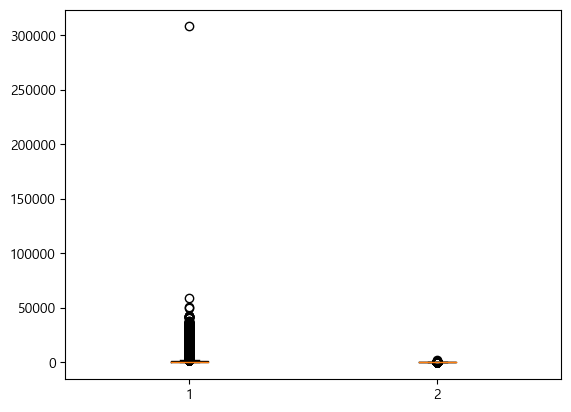

In [12]:
plt.boxplot([df_train['item_price'] , df_train['item_cnt_day']])
plt.show()

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935843.0,14.569913,9.422992,0.0,7.0,14.0,23.0,33.0
shop_id,2935843.0,33.001713,16.226976,0.0,22.0,31.0,47.0,59.0
item_id,2935843.0,10197.229013,6324.292703,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935843.0,890.853472,1729.801324,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935843.0,1.242641,2.618837,-22.0,1.0,1.0,1.0,2169.0


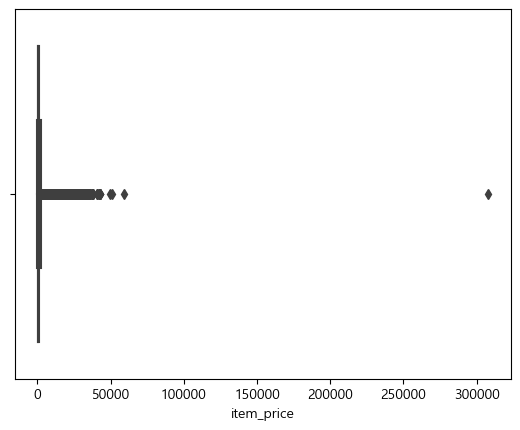

In [14]:
sns.boxplot(x = df_train['item_price'])
plt.show()

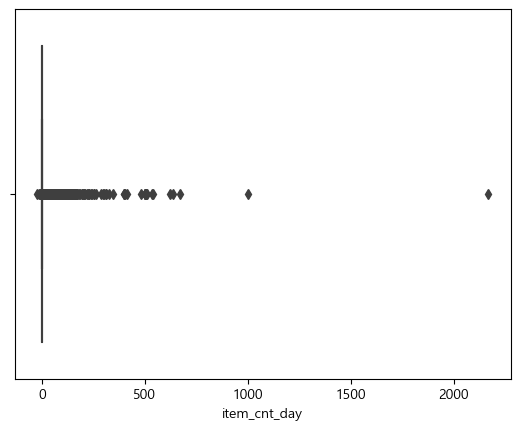

In [15]:
sns.boxplot(x = df_train['item_cnt_day'])
plt.show()

In [16]:
df_train = df_train[df_train['item_price']>=0]
df_train = df_train[df_train['item_cnt_day'] >= 0]

In [17]:
df_train = df_train[df_train['item_price'] < 150000]

In [18]:
df_train = df_train[df_train['item_cnt_day'] < 900]

In [19]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [20]:
df_shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [21]:
df_shops['city'] = df_shops['shop_name'].str.split(' ').map(lambda x : x[0])

In [22]:
df_shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [23]:
df_shops.loc[df_shops['city'] == '!Якутск' , 'city'] = 'Якутск'

In [24]:
df_shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [25]:
df_shops.city.value_counts()

Москва              13
Якутск               4
РостовНаДону         3
Воронеж              3
Тюмень               3
Новосибирск          2
Н.Новгород           2
Самара               2
Красноярск           2
Казань               2
Жуковский            2
Уфа                  2
СПб                  2
Томск                1
Сургут               1
Сергиев              1
Химки                1
Цифровой             1
Чехов                1
Мытищи               1
Омск                 1
Адыгея               1
Курск                1
Коломна              1
Калуга               1
Интернет-магазин     1
Выездная             1
Вологда              1
Волжский             1
Балашиха             1
Ярославль            1
Name: city, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

city_encoder = LabelEncoder()
df_shops['city_id'] = city_encoder.fit_transform(df_shops['city'])
df_shops = df_shops[['shop_id','city_id']]

In [27]:
df_shops.head()

,shop_id,city_id
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [28]:
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [29]:
df_item_categories['type'] = df_item_categories['item_category_name'].str.split('-').map(lambda x : x[0])

In [30]:
df_item_categories.type.value_counts()

Книги                                13
Подарки                              12
Игровые консоли                       8
Игры                                  8
Аксессуары                            7
Программы                             6
Музыка                                6
Кино                                  5
Карты оплаты                          4
Игры PC                               4
Чистые носители (штучные)             1
Чистые носители (шпиль)               1
Служебные                             1
Служебные                             1
PC                                    1
Карты оплаты (Кино, Музыка, Игры)     1
Игры MAC                              1
Игры Android                          1
Доставка товара                       1
Билеты (Цифра)                        1
Элементы питания                      1
Name: type, dtype: int64

In [31]:
lb = LabelEncoder()
df_item_categories['type_id'] = lb.fit_transform(list(df_item_categories['type']))

In [32]:
df_item_categories

,item_category_name,item_category_id,type,type_id
0,PC - Гарнитуры/Наушники,0,PC,0
1,Аксессуары - PS2,1,Аксессуары,1
2,Аксессуары - PS3,2,Аксессуары,1
3,Аксессуары - PS4,3,Аксессуары,1
4,Аксессуары - PSP,4,Аксессуары,1
...,...,...,...,...
79,Служебные,79,Служебные,16
80,Служебные - Билеты,80,Служебные,17
81,Чистые носители (шпиль),81,Чистые носители (шпиль),18
82,Чистые носители (штучные),82,Чистые носители (штучные),19


In [33]:
df_items.drop('item_name' , axis = 1 , inplace = True)

In [34]:
df_items

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40
...,...,...
22165,22165,31
22166,22166,54
22167,22167,49
22168,22168,62


In [35]:
len(df_test.shop_id.unique())

42

In [36]:
len(set(df_test.item_id) - set(df_train.item_id.unique()))

363

In [37]:
df_train.date

0          02.01.2013
1          03.01.2013
3          06.01.2013
4          15.01.2013
5          10.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 2928483, dtype: object

In [38]:
len(df_train.date_block_num.unique())

34

In [39]:
import itertools as it
matrix = []
cols = ['date_block_num','shop_id','item_id']

for i in range(34):
    sales = df_train[df_train.date_block_num == i]
    matrix.append(list(it.product([i] , sales['shop_id'].unique() , sales['item_id'].unique())))

In [40]:
matrix

[[(0, 59, 22154),
  (0, 59, 2552),
  (0, 59, 2554),
  (0, 59, 2555),
  (0, 59, 2564),
  (0, 59, 2565),
  (0, 59, 2572),
  (0, 59, 2573),
  (0, 59, 2574),
  (0, 59, 2593),
  (0, 59, 2604),
  (0, 59, 2607),
  (0, 59, 2609),
  (0, 59, 2548),
  (0, 59, 2611),
  (0, 59, 2546),
  (0, 59, 2515),
  (0, 59, 2705),
  (0, 59, 2715),
  (0, 59, 2716),
  (0, 59, 2719),
  (0, 59, 2720),
  (0, 59, 2473),
  (0, 59, 2480),
  (0, 59, 2731),
  (0, 59, 2746),
  (0, 59, 2748),
  (0, 59, 2522),
  (0, 59, 2614),
  (0, 59, 2798),
  (0, 59, 2833),
  (0, 59, 2835),
  (0, 59, 2836),
  (0, 59, 2844),
  (0, 59, 2845),
  (0, 59, 2847),
  (0, 59, 2848),
  (0, 59, 2854),
  (0, 59, 2857),
  (0, 59, 2920),
  (0, 59, 2795),
  (0, 59, 2808),
  (0, 59, 2628),
  (0, 59, 2629),
  (0, 59, 2631),
  (0, 59, 2640),
  (0, 59, 2822),
  (0, 59, 2704),
  (0, 59, 2703),
  (0, 59, 2088),
  (0, 59, 2090),
  (0, 59, 2092),
  (0, 59, 2100),
  (0, 59, 2102),
  (0, 59, 2103),
  (0, 59, 2106),
  (0, 59, 2108),
  (0, 59, 2111),
  (0, 59, 211

In [41]:
matrix = pd.DataFrame(np.vstack(matrix) , columns = cols)

In [42]:
matrix.head()

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [43]:
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)

In [44]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884508 entries, 0 to 10884507
Data columns (total 3 columns):
 #   Column          Dtype
---  ------          -----
 0   date_block_num  int8 
 1   shop_id         int8 
 2   item_id         int16
dtypes: int16(1), int8(2)
memory usage: 41.5 MB


In [45]:
matrix

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10884503,33,21,7635
10884504,33,21,7638
10884505,33,21,7640
10884506,33,21,7632


In [46]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [48]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   item_id           22170 non-null  int64
 1   item_category_id  22170 non-null  int64
dtypes: int64(2)
memory usage: 346.5 KB


In [49]:
len(df_items.item_category_id.unique())

84

In [50]:
df_item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
 2   type                84 non-null     object
 3   type_id             84 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.8+ KB


In [51]:
df_item = pd.merge(df_items , df_item_categories , on = 'item_category_id')

In [52]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             22170 non-null  int64 
 1   item_category_id    22170 non-null  int64 
 2   item_category_name  22170 non-null  object
 3   type                22170 non-null  object
 4   type_id             22170 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ MB


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928483 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.4+ MB


In [54]:
df_result = pd.merge(df_train , df_item , on = 'item_id')

In [55]:
df_result

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_category_name,type,type_id
0,02.01.2013,0,59,22154,999.0,1.0,37,Кино - Blu-Ray,Кино,11
1,23.01.2013,0,24,22154,999.0,1.0,37,Кино - Blu-Ray,Кино,11
2,20.01.2013,0,27,22154,999.0,1.0,37,Кино - Blu-Ray,Кино,11
3,02.01.2013,0,25,22154,999.0,1.0,37,Кино - Blu-Ray,Кино,11
4,03.01.2013,0,25,22154,999.0,1.0,37,Кино - Blu-Ray,Кино,11
...,...,...,...,...,...,...,...,...,...,...
2928478,17.10.2015,33,25,8428,249.0,1.0,40,Кино - DVD,Кино,11
2928479,01.10.2015,33,25,7903,12198.0,1.0,15,Игровые консоли - XBOX 360,Игровые консоли,4
2928480,29.10.2015,33,25,7610,2890.0,1.0,64,Подарки - Настольные игры,Подарки,14
2928481,22.10.2015,33,25,7635,2100.0,1.0,64,Подарки - Настольные игры,Подарки,14


In [56]:
len(df_result.shop_id.unique())

60

In [57]:
len(df_test.shop_id.unique())

42

In [58]:
matrix

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10884503,33,21,7635
10884504,33,21,7638
10884505,33,21,7640
10884506,33,21,7632


In [59]:
df_train['revenue'] = df_train['item_price'] * df_train['item_cnt_day']

In [60]:
group = df_train.groupby(['date_block_num' , 'shop_id','item_id']).agg({'item_cnt_day' : ['sum']})
group.head()

item_cnt_day
                                        sum
date_block_num shop_id item_id             
0              0       32               6.0
                       33               3.0
                       35               1.0
                       43               1.0
                       51               2.0

In [61]:
group.columns = ['item_cnt_month']

In [62]:
group

item_cnt_month
date_block_num shop_id item_id                
0              0       32                  6.0
                       33                  3.0
                       35                  1.0
                       43                  1.0
                       51                  2.0
...                                        ...
33             59      22087               6.0
                       22088               2.0
                       22091               1.0
                       22100               1.0
                       22102               1.0

[1608224 rows x 1 columns]

In [63]:
group.reset_index(inplace = True)
group

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1608219,33,59,22087,6.0
1608220,33,59,22088,2.0
1608221,33,59,22091,1.0
1608222,33,59,22100,1.0


In [64]:
matrix

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10884503,33,21,7635
10884504,33,21,7638
10884505,33,21,7640
10884506,33,21,7632


In [65]:
matrix = pd.merge(matrix , group , how = 'left')
matrix

,date_block_num,shop_id,item_id,item_cnt_month
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
10884503,33,21,7635,NaN
10884504,33,21,7638,NaN
10884505,33,21,7640,NaN
10884506,33,21,7632,NaN


In [66]:
matrix.fillna(0 , inplace = True)

In [67]:
len(matrix.item_id.unique())

21803

In [68]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
10884503,33,21,7635,0.0
10884504,33,21,7638,0.0
10884505,33,21,7640,0.0
10884506,33,21,7632,0.0


In [69]:
df_test['date_block_num'] = 34

In [70]:
df_test = df_test[['date_block_num','shop_id','item_id']]

In [71]:
df_test

,date_block_num,shop_id,item_id
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268
...,...,...,...
214195,34,45,18454
214196,34,45,16188
214197,34,45,15757
214198,34,45,19648


In [72]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [73]:
ss.fit(matrix.iloc[:,:-1])
train_scaled = ss.transform(matrix.iloc[:,:-1])
test_scaled = ss.transform(df_test)

In [74]:
train_target = matrix.iloc[:,-1]

In [75]:
from sklearn.svm import SVC

In [76]:
svc = SVC(C = 0.1 , kernel = 'rbf' , gamma = 0.001)

In [ ]:
svc.fit(train_scaled , train_target)

In [ ]:
prediction = pd.read_csv('sample_submission.csv')

In [ ]:
prediction.iloc[:,1] = svc.predict(test_scaled)

In [ ]:
prediction.to_csv('pred.csv' , index = False)